In [1]:
import numpy as np
import matplotlib as plt
import csv
import pandas as pd
%matplotlib inline
import matplotlib.dates as mdates
import math
import seaborn as sns


In [2]:
data_path = r"/Users/Owner/Documents/Work_transfer/Data/GCconnex/"
save_path = r"/Users/Owner/Documents/Work_transfer/Data/"

In [17]:
# Create Data Frame of Users Activity Joined
df = pd.read_csv(data_path+"gcconnex_users_activity_joined.csv")
df['Date Created'] = pd.to_datetime(df['Date Created'], format="%d-%m-%Y")
#Create an index for Date Created, and reordered date to work with Pandas better
df.index = df['Date Created']
del df['Date Created']
df.head()

,User GUID,User Email,Entities Last Activity,User Last Activity,Entity Last Updated
Date Created,,,,,
2008-12-15,4,jean.richard@tpsgc-pwgsc.gc.ca,31-12-1969,24-08-2009,24-08-2009
2008-12-15,6,Charles.degrasse@tbs-sct.gc.ca,04-06-2015,14-07-2015,14-07-2015
2008-12-15,7,Karl.Ghiara@hc-sc.gc.ca,03-02-2015,27-03-2015,27-03-2015
2008-12-15,19,joel.racicot@canada.ca,21-04-2015,10-07-2015,10-07-2015
2008-12-15,22,bruno.grossmann@international.gc.ca,03-06-2015,03-06-2015,03-06-2015


In [18]:
df.to_csv(save_path+'datamungecheck2.csv')

In [4]:
#Registration count by counting how many registrations happened in a given month
regcount = df.resample('M', how='count')

In [5]:
#Dropping all the other useless values because I'm bad at coding

registries = regcount.drop(['User Email', 'Entities Last Activity', 'User Last Activity', 'Entity Last Updated'], axis = 1)
registries.describe()

,User GUID
count,85.000000
mean,780.105882
std,818.529838
min,18.000000
25%,208.000000
50%,299.000000
75%,1478.000000
max,3246.000000


In [35]:
registries.head(85)

,User GUID
Date Created,
2008-12-31,18
2009-01-31,74
2009-02-28,92
2009-03-31,71
2009-04-30,88
2009-05-31,141
2009-06-30,327
2009-07-31,209
2009-08-31,109


In [37]:
registries.to_csv(save_path+'registries.csv')

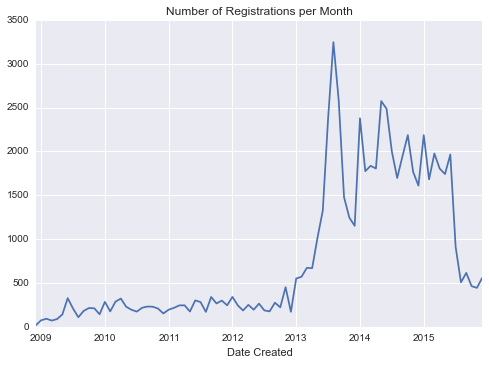

In [6]:
#Plotting the amount of registrations in a given month
#Can you guess when Blueprint 2020 was launched?
registries.plot(title="Number of Registrations per Month", legend=False)
plt.pyplot.savefig(save_path+'Registrations Per Month.png')


In [7]:
total_registrations = registries

In [8]:
#This computes the function of monthly registered users for each month
total_registrations = pd.rolling_sum(total_registrations, 85, min_periods=0)

In [13]:
total_registrations[30:60]

,User GUID
Date Created,
2011-06-30,5955
2011-07-31,6237
2011-08-31,6407
2011-09-30,6747
2011-10-31,7013
2011-11-30,7312
2011-12-31,7557
2012-01-31,7898
2012-02-29,8143


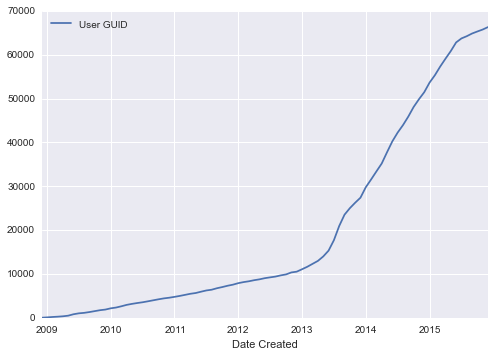

In [10]:
#A chart showing the growth of users over time
total_registrations.plot()

In [11]:
# Now for the regression.
# According to the literature, social network models grow like: y = x(t^b), where x is time and a and b are parameters
# The next step is to create a series of x's to act as t = 1, 2, 3, ....
X = np.arange(1,86)
total_registrations['X'] = X
X = total_registrations['X']
Y = total_registrations['User GUID']

In [33]:
total_registrations.tail()

,User GUID,X
Date Created,,
2015-08-31,64228,81
2015-09-30,64843,82
2015-10-31,65307,83
2015-11-30,65751,84
2015-12-31,66309,85


In [12]:
# It is possible to estimate the parameters a and b using a linear regression
# The property of logarithms can make it such that ln(y) = ln(x) + b*ln(t)
Y = np.log(Y)
X = np.log(X)
model_all = pd.ols(y=Y, x=X)

In [13]:
model_all


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         85
Number of Degrees of Freedom:   2

R-squared:         0.9636
Adj R-squared:     0.9631

Rmse:              0.3148

F-stat (1, 83):  2195.8103, p-value:     0.0000

Degrees of Freedom: model 1, resid 83

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     1.7490     0.0373      46.86     0.0000     1.6759     1.8222
     intercept     2.9517     0.1343      21.98     0.0000     2.6885     3.2149
---------------------------------End of Summary---------------------------------

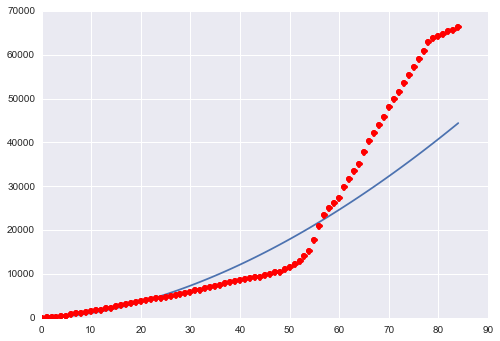

In [14]:
# The function is therefore ln(y) = 1.749 + 2.95ln(t)
# Therefore y = (e^1.749)*(t^2.95)

def graph(formula, x_range):
    x = np.array(x_range)
    y = eval(formula)
    plt.pyplot.plot(x,y)
q = graph('math.exp(2.9517)*(x**1.7490)', range(0,85))
plt.pyplot.plot(total_registrations['User GUID'], 'ro')
plt.pyplot.plot(q)

In [15]:
#The function does a good job emulating the shape of the graph, and can make some fairly good predictions
# But only for the middle range of the graph. There is a clear break in the graph before and after the launch of
# Blueprint 2020. Dividing the graph into two equations, before and after blueprint 2020 might give better predictions

In [16]:
pre2020 = total_registrations[0:55]
pre2020

,User GUID,X
Date Created,,
2008-12-31,18,1
2009-01-31,92,2
2009-02-28,184,3
2009-03-31,255,4
2009-04-30,343,5
2009-05-31,484,6
2009-06-30,811,7
2009-07-31,1020,8
2009-08-31,1129,9


In [17]:
#This gives the dataset appropriate for a function where t = 1 again.
#This data goes all the way until June 2013, because that's when Blueprint 2020 was launched
X = pre2020['X']
Y = pre2020['User GUID']
X = np.log(X)
Y = np.log(Y)
model_pre2020 = pd.ols(y=Y, x=X)

In [18]:
# The process for the regression is the same as above. Estimating a function where the parameters are
# y = x(t^b), but to estimate this function linearly the logarithms were taken and regressed upon
model_pre2020


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         55
Number of Degrees of Freedom:   2

R-squared:         0.9890
Adj R-squared:     0.9888

Rmse:              0.1436

F-stat (1, 53):  4756.7786, p-value:     0.0000

Degrees of Freedom: model 1, resid 53

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     1.5050     0.0218      68.97     0.0000     1.4622     1.5478
     intercept     3.5459     0.0695      51.00     0.0000     3.4096     3.6822
---------------------------------End of Summary---------------------------------

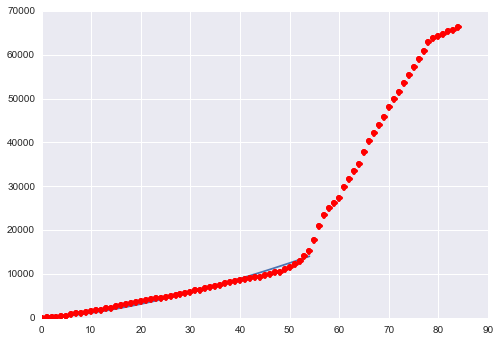

In [19]:
#Graphing the estimation which is y = (e^3.5459)*(x^1.5050) against the actual data
def graph(formula, x_range):
    x = np.array(x_range)
    y = eval(formula)
    plt.pyplot.plot(x,y)
r = graph('math.exp(3.5459)*(x**1.5050)', range(0,55))
plt.pyplot.plot(total_registrations['User GUID'],'ro')
plt.pyplot.plot(q)


In [20]:
#Now to look at what happened post Blueprint 2020
# Again parsing the data to include only post Blueprint
post2020 = total_registrations[55:80]

#Rearranging the scale so that it starts from t = 1 again, othewise the measure will be biased
X = np.arange(1,26)
post2020['X'] = X
X = post2020['X']
Y = post2020['User GUID']
X = np.log(X)
Y = np.log(Y)
model_post2020 = pd.ols(y=Y, x=X)


C:\Users\Owner\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [21]:
model_post2020


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         25
Number of Degrees of Freedom:   2

R-squared:         0.9472
Adj R-squared:     0.9450

Rmse:              0.0875

F-stat (1, 23):   412.9733, p-value:     0.0000

Degrees of Freedom: model 1, resid 23

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.4351     0.0214      20.32     0.0000     0.3931     0.4770
     intercept     9.5668     0.0527     181.65     0.0000     9.4636     9.6700
---------------------------------End of Summary---------------------------------

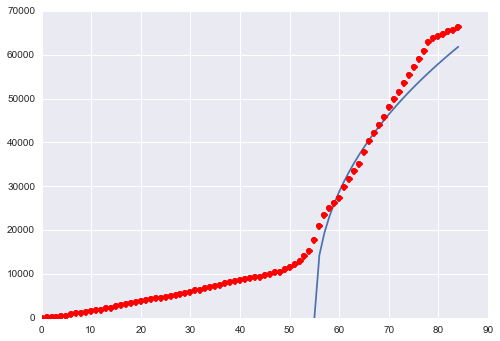

In [22]:
# Graphing the function y = (e^9.5668)*(t^0.4351)
def graph(formula, x_range):
    x = np.array(x_range)
    y = eval(formula)
    plt.pyplot.plot(x,y)
s = graph('math.exp(9.5668)*((x-55)**0.4351)', range(54,85))
plt.pyplot.plot(total_registrations['User GUID'], 'ro')
plt.pyplot.plot(q)

In [23]:
#When the data is split up into two, it looks like a linear equation would be effective to describe the data
#This is easy to test

In [24]:
lin_model_post2020 = pd.ols(y=post2020['User GUID'], x=post2020['X'])
lin_model_post2020


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         25
Number of Degrees of Freedom:   2

R-squared:         0.9985
Adj R-squared:     0.9984

Rmse:            562.4870

F-stat (1, 23): 15244.1218, p-value:     0.0000

Degrees of Freedom: model 1, resid 23

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x  1926.1585    15.6006     123.47     0.0000  1895.5813  1956.7356
     intercept 16677.8600   231.9193      71.91     0.0000 16223.2981 17132.4219
---------------------------------End of Summary---------------------------------

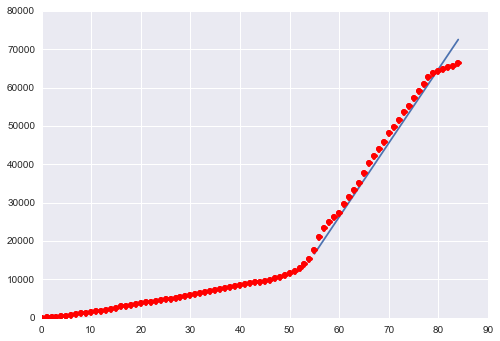

In [25]:
def graph(formula, x_range):
    x = np.array(x_range)
    y = eval(formula)
    plt.pyplot.plot(x,y)
t = graph('1926.1585*(x-55)+16677.8600', range(55,85))
plt.pyplot.plot(total_registrations['User GUID'], 'ro')

In [26]:
#Judging by the R squared numbers of both functions, the linear function is actually a much better fit
# But this could just be because of the fact that there is no intercept with the previous function. 
# More work will have to be done to get the right answers on this

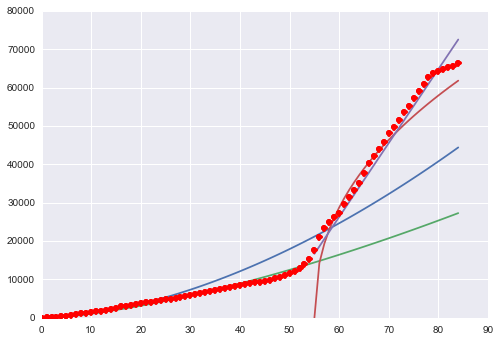

In [27]:
q = graph('math.exp(2.9517)*(x**1.7490)', range(0,85))
r = graph('math.exp(3.5459)*(x**1.5050)', range(0,85))
s = graph('math.exp(9.5668)*((x-55)**0.4351)', range(54,85))
t = graph('1926.1585*(x-55)+16677.8600', range(55,85))
plt.pyplot.plot(total_registrations['User GUID'], 'ro')


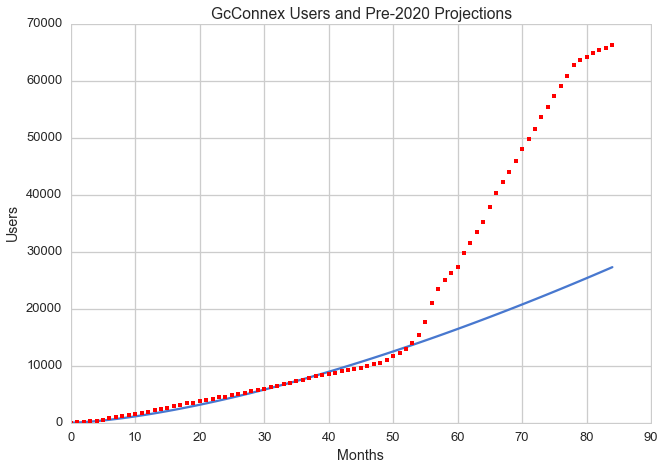

In [28]:
sns.set(context='talk', style='whitegrid', palette='muted', color_codes=False)
sns.axlabel('Months', 'Users')
r = graph('math.exp(3.5459)*(x**1.5050)', range(0,85))
plt.pyplot.plot(total_registrations['User GUID'], 'r.', label='Registered Users')
plt.pyplot.title('GcConnex Users and Pre-2020 Projections')

In [ ]:
plt.pyplot.savefig(save_path+'pre2020_projection.png')

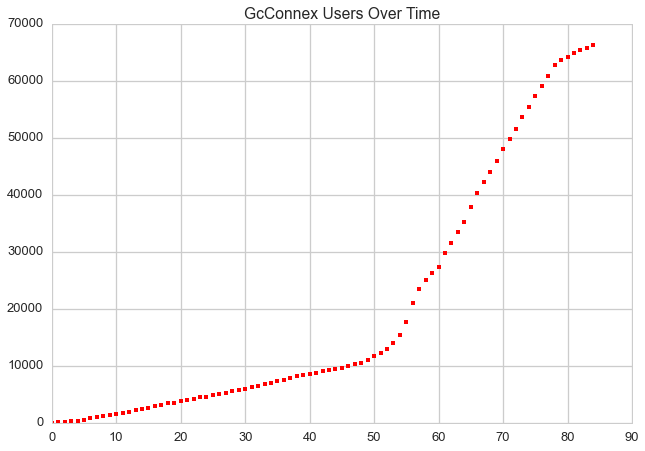

In [32]:
plt.pyplot.plot(total_registrations['User GUID'], 'r.')
plt.pyplot.title('GcConnex Users Over Time')
plt.pyplot.savefig(save_path+'GCconnex Users Plot.png')